In [1]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras import layers
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Step 1: Load the test data (features) from the file 'x_test.npy'
data = np.load('x_test.npy')

# Step 2: Load the test labels from the file 't_test.npy'
labels = np.load('t_test.npy')

# Reshaping the data to match the expected input shape for the model (300x300 RGB image)
data = data[:,:].reshape(data.shape[0],300,300,3)

# Normalizing the data by dividing by 255, converting to float16 to save memory
data = data.astype('float16') / 255

# Converting the labels to one-hot encoded format with 10 classes
labels = tf.keras.utils.to_categorical(labels, num_classes=10)

In [3]:
# Step 3: Define the path to the saved model checkpoint (best_model.h5)
checkpoint_path = 'best_model.h5'

# Getting the directory path of the checkpoint
checkpoint_dir = os.path.dirname(checkpoint_path)

# Note: Make sure to have the weights downloaded on your path with the name best_model.h5
# Loading the model from the specified checkpoint path
model = load_model(checkpoint_path)


2023-08-07 20:17:17.354413: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-07 20:17:17.918794: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 79111 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:bd:00.0, compute capability: 8.0


In [4]:
def classifyUnknowns(model, data, threshold):
    # model: Trained machine learning model used to predict class probabilities.
    # data: Input data to be classified, expected to be in the correct shape for the given model.
    # threshold: Confidence threshold for classifying a sample as "unknown."

    predictions = model.predict(data) # Predict class probabilities for the given data
    max_probs = np.max(predictions, axis=1) # Find the maximum probability for each sample
    class_labels = np.argmax(predictions, axis=1) # Find the class label corresponding to the maximum probability for each sample
    class_labels[max_probs < threshold] = -1 # Identify "unknown" classes by setting class labels to -1 where the maximum probability is below the threshold
    return class_labels # Return the class labels, with "unknown" classes marked as -1

In [5]:
# Call classifyUnknowns function with the trained model and data, using a threshold of 0.6 and assign the labels to "y"
y = classifyUnknowns(model, data, 0.6)

2023-08-07 20:17:24.139479: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8201
2023-08-07 20:17:26.446073: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [6]:
# Print predicted class labels
y

array([9, 1, 2, ..., 6, 9, 4])



TEST
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.91      0.91      0.91       175
           1       0.96      0.87      0.92       182
           2       0.98      0.94      0.96       175
           3       0.96      0.94      0.95       189
           4       0.99      0.98      0.99       195
           5       0.96      0.97      0.96       161
           6       0.98      0.94      0.96       175
           7       0.97      0.97      0.97       175
           8       0.96      0.94      0.95       173
           9       0.96      0.91      0.93       180

    accuracy                           0.94      1780
   macro avg       0.88      0.85      0.86      1780
weighted avg       0.96      0.94      0.95      1780



/apps/tensorflow/2.7.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/tensorflow/2.7.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/apps/tensorflow/2.7.0/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


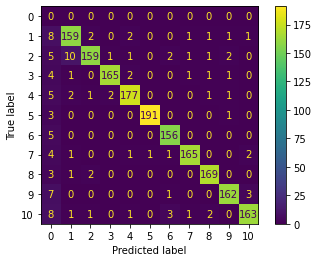

In [7]:
print('\n\nTEST') # Print a header for the test results section

# Print the classification report, comparing the true labels (from 'labels') with the predicted labels (from 'y')
# This report includes metrics like precision, recall, f1-score, support, and accuracy
print(classification_report(np.argmax(labels, axis=1), y))

# Create and plot a confusion matrix to visualize the correctly and incorrectly classified samples
# The confusion matrix compares the true labels with the predicted labels
disp_test = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(np.argmax(labels, axis=1), y))
disp_test.plot()